## **PTID-CDS-JUL-23-1590 PRCP-1016-HeartDieseasePred - PROJECT 2**

# Task 1:- Prepare a complete data analysis report on the given data. 

# 1.Data preparation-Importing the required libraries

In [1]:
# numpy and pandas for data manipulation
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# display plots on the notebook itself
%matplotlib inline

# To suppress the warnings 
import warnings
warnings.filterwarnings('ignore')

# File system manangement
import os
print(os.listdir())

#Calling pandas function to display maximum rows and columns
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None)

['.ipynb_checkpoints', 'Data', 'description.docx', 'labels.csv', 'PRCP-1016-HeartDieseasePred.ipynb', 'PTID-CDS-JUL-23-1590 PRCP-1016-HeartDieseasePred-PROJECT 2.ipynb', 'values.csv', '~$scription.docx']


# 2.Exploratory Data Analysis of the data set

## 2.1 Reading/loading labels.csv file

In [2]:
#Reading labels.csv file 
data=pd.read_csv('labels.csv')

In [3]:
#Exploring first five rows of the data
data.head()

,patient_id,heart_disease_present
0,0z64un,0
1,ryoo3j,0
2,yt1s1x,1
3,l2xjde,1
4,oyt4ek,0


In [4]:
#Checking dimensions of the data
data.shape

(180, 2)

# 2.2 Reading/loading values.csv file

In [5]:
#Reading values.csv file 
data1=pd.read_csv('values.csv')

In [6]:
#Exploring first five rows of the data
data1.head()

,patient_id,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [7]:
#Checking dimensions of the data
data1.shape

(180, 14)

## 2.3 Merging the files label.csv and values.csv.

The shape of the file labels.csv is (180, 2), and patient.csv is (180, 14). Both files share the unique common identifier, patient_id. Based on the unique identifier and the same number of rows, we can use the simple merge option to combine both files.

In [8]:
#Merging data(labels.csv) and data1(values.csv) based on 'patient_id' using a left join
Heart_disease_dataset = data.merge(data1, on='patient_id', how='left')

## 2.4 EDA and Feature Engineering on the merged data set

In [9]:
#Exploring first five rows of the dataframe Heart_disease_dataset
Heart_disease_dataset.head()

,patient_id,heart_disease_present,slope_of_peak_exercise_st_segment,thal,resting_blood_pressure,chest_pain_type,num_major_vessels,fasting_blood_sugar_gt_120_mg_per_dl,resting_ekg_results,serum_cholesterol_mg_per_dl,oldpeak_eq_st_depression,sex,age,max_heart_rate_achieved,exercise_induced_angina
0,0z64un,0,1,normal,128,2,0,0,2,308,0.0,1,45,170,0
1,ryoo3j,0,2,normal,110,3,0,0,0,214,1.6,0,54,158,0
2,yt1s1x,1,1,normal,125,4,3,0,2,304,0.0,1,77,162,1
3,l2xjde,1,1,reversible_defect,152,4,0,0,0,223,0.0,1,40,181,0
4,oyt4ek,0,3,reversible_defect,178,1,0,0,2,270,4.2,1,59,145,0


In [10]:
#Checking dimensions of the dataframe Heart_disease_dataset
Heart_disease_dataset.shape

(180, 15)

In [11]:
#summarize both numerical and categorical values.
Heart_disease_dataset.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
patient_id,180,180,0z64un,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
heart_disease_present,180.0,NaN,NaN,NaN,0.444444,0.49829,0.0,0.0,0.0,1.0,1.0
slope_of_peak_exercise_st_segment,180.0,NaN,NaN,NaN,1.55,0.618838,1.0,1.0,1.0,2.0,3.0
thal,180,3,normal,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
resting_blood_pressure,180.0,NaN,NaN,NaN,131.311111,17.010443,94.0,120.0,130.0,140.0,180.0
chest_pain_type,180.0,NaN,NaN,NaN,3.155556,0.938454,1.0,3.0,3.0,4.0,4.0
num_major_vessels,180.0,NaN,NaN,NaN,0.694444,0.969347,0.0,0.0,0.0,1.0,3.0
fasting_blood_sugar_gt_120_mg_per_dl,180.0,NaN,NaN,NaN,0.161111,0.368659,0.0,0.0,0.0,0.0,1.0
resting_ekg_results,180.0,NaN,NaN,NaN,1.05,0.998742,0.0,0.0,2.0,2.0,2.0
serum_cholesterol_mg_per_dl,180.0,NaN,NaN,NaN,249.211111,52.717969,126.0,213.75,245.5,281.25,564.0


### Checking for duplicates in the dataframe

In [12]:
# checking for duplicates in the merged dataframe Heart_disease_dataset 
print('The no of duplicates in the data:',Heart_disease_dataset.duplicated().sum())

The no of duplicates in the data: 0


### Checking the null values

In [13]:
# checking for null values in the merged dataframe Heart_disease_dataset 
Heart_disease_dataset.isnull().sum()


patient_id                              0
heart_disease_present                   0
slope_of_peak_exercise_st_segment       0
thal                                    0
resting_blood_pressure                  0
chest_pain_type                         0
num_major_vessels                       0
fasting_blood_sugar_gt_120_mg_per_dl    0
resting_ekg_results                     0
serum_cholesterol_mg_per_dl             0
oldpeak_eq_st_depression                0
sex                                     0
age                                     0
max_heart_rate_achieved                 0
exercise_induced_angina                 0
dtype: int64

## Checking datatype of all the columns inthe dataframe

In [14]:
# Display the data types of columns in the Heart_disease_dataset
Heart_disease_dataset.dtypes

patient_id                               object
heart_disease_present                     int64
slope_of_peak_exercise_st_segment         int64
thal                                     object
resting_blood_pressure                    int64
chest_pain_type                           int64
num_major_vessels                         int64
fasting_blood_sugar_gt_120_mg_per_dl      int64
resting_ekg_results                       int64
serum_cholesterol_mg_per_dl               int64
oldpeak_eq_st_depression                float64
sex                                       int64
age                                       int64
max_heart_rate_achieved                   int64
exercise_induced_angina                   int64
dtype: object

# Univariate Analysis

## Spread of Target data- Balanced / Imbalanced Dataset

In [15]:
## Spread of Target data- Balanced / Imbalanced Dataset
heart_disease_present_counts = Heart_disease_dataset['heart_disease_present'].value_counts()
print("Count of each unique value in 'heart_disease_present' column:\n", heart_disease_present_counts)

Count of each unique value in 'heart_disease_present' column:
 0    100
1     80
Name: heart_disease_present, dtype: int64


## Creating a list for categorical and numerical data in the dataframe

In [16]:
# Separating categorical and numerical data columns from the Heart_disease_dataset
categorical_data=Heart_disease_dataset[['thal']]
numerical_data=Heart_disease_dataset[['slope_of_peak_exercise_st_segment','resting_blood_pressure','chest_pain_type','num_major_vessels','fasting_blood_sugar_gt_120_mg_per_dl',
                       'resting_ekg_results','serum_cholesterol_mg_per_dl','oldpeak_eq_st_depression','sex','age','max_heart_rate_achieved','exercise_induced_angina']]

### data visualization for categorical data

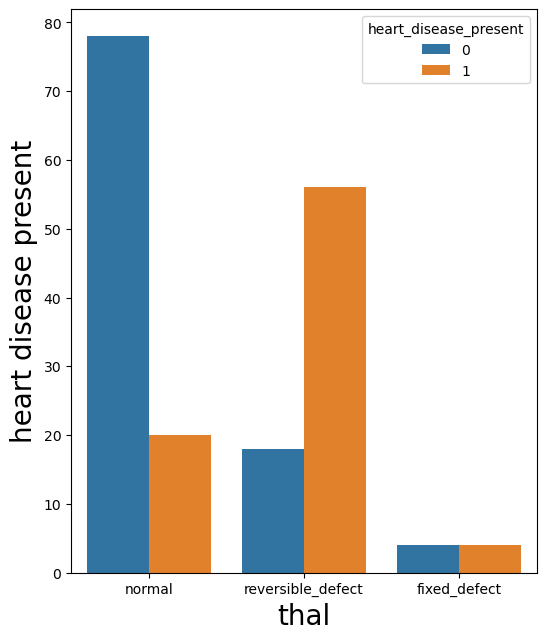

In [17]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set canvas size for the plots
plotnumber = 1  # Counter to keep track of subplots

for column in categorical_data:  # Iterate through categorical columns
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)  # Create a subplot
        sns.countplot(x=categorical_data[column], hue=Heart_disease_dataset['heart_disease_present'])
        plt.xlabel(column, fontsize=20)  # Set x-axis label and font size
        plt.ylabel('heart disease present', fontsize=20)  # Set y-axis label and font size
    plotnumber += 1  # Increment the counter
plt.tight_layout()  # Adjust layout for better spacing


### data visualization for numerical data

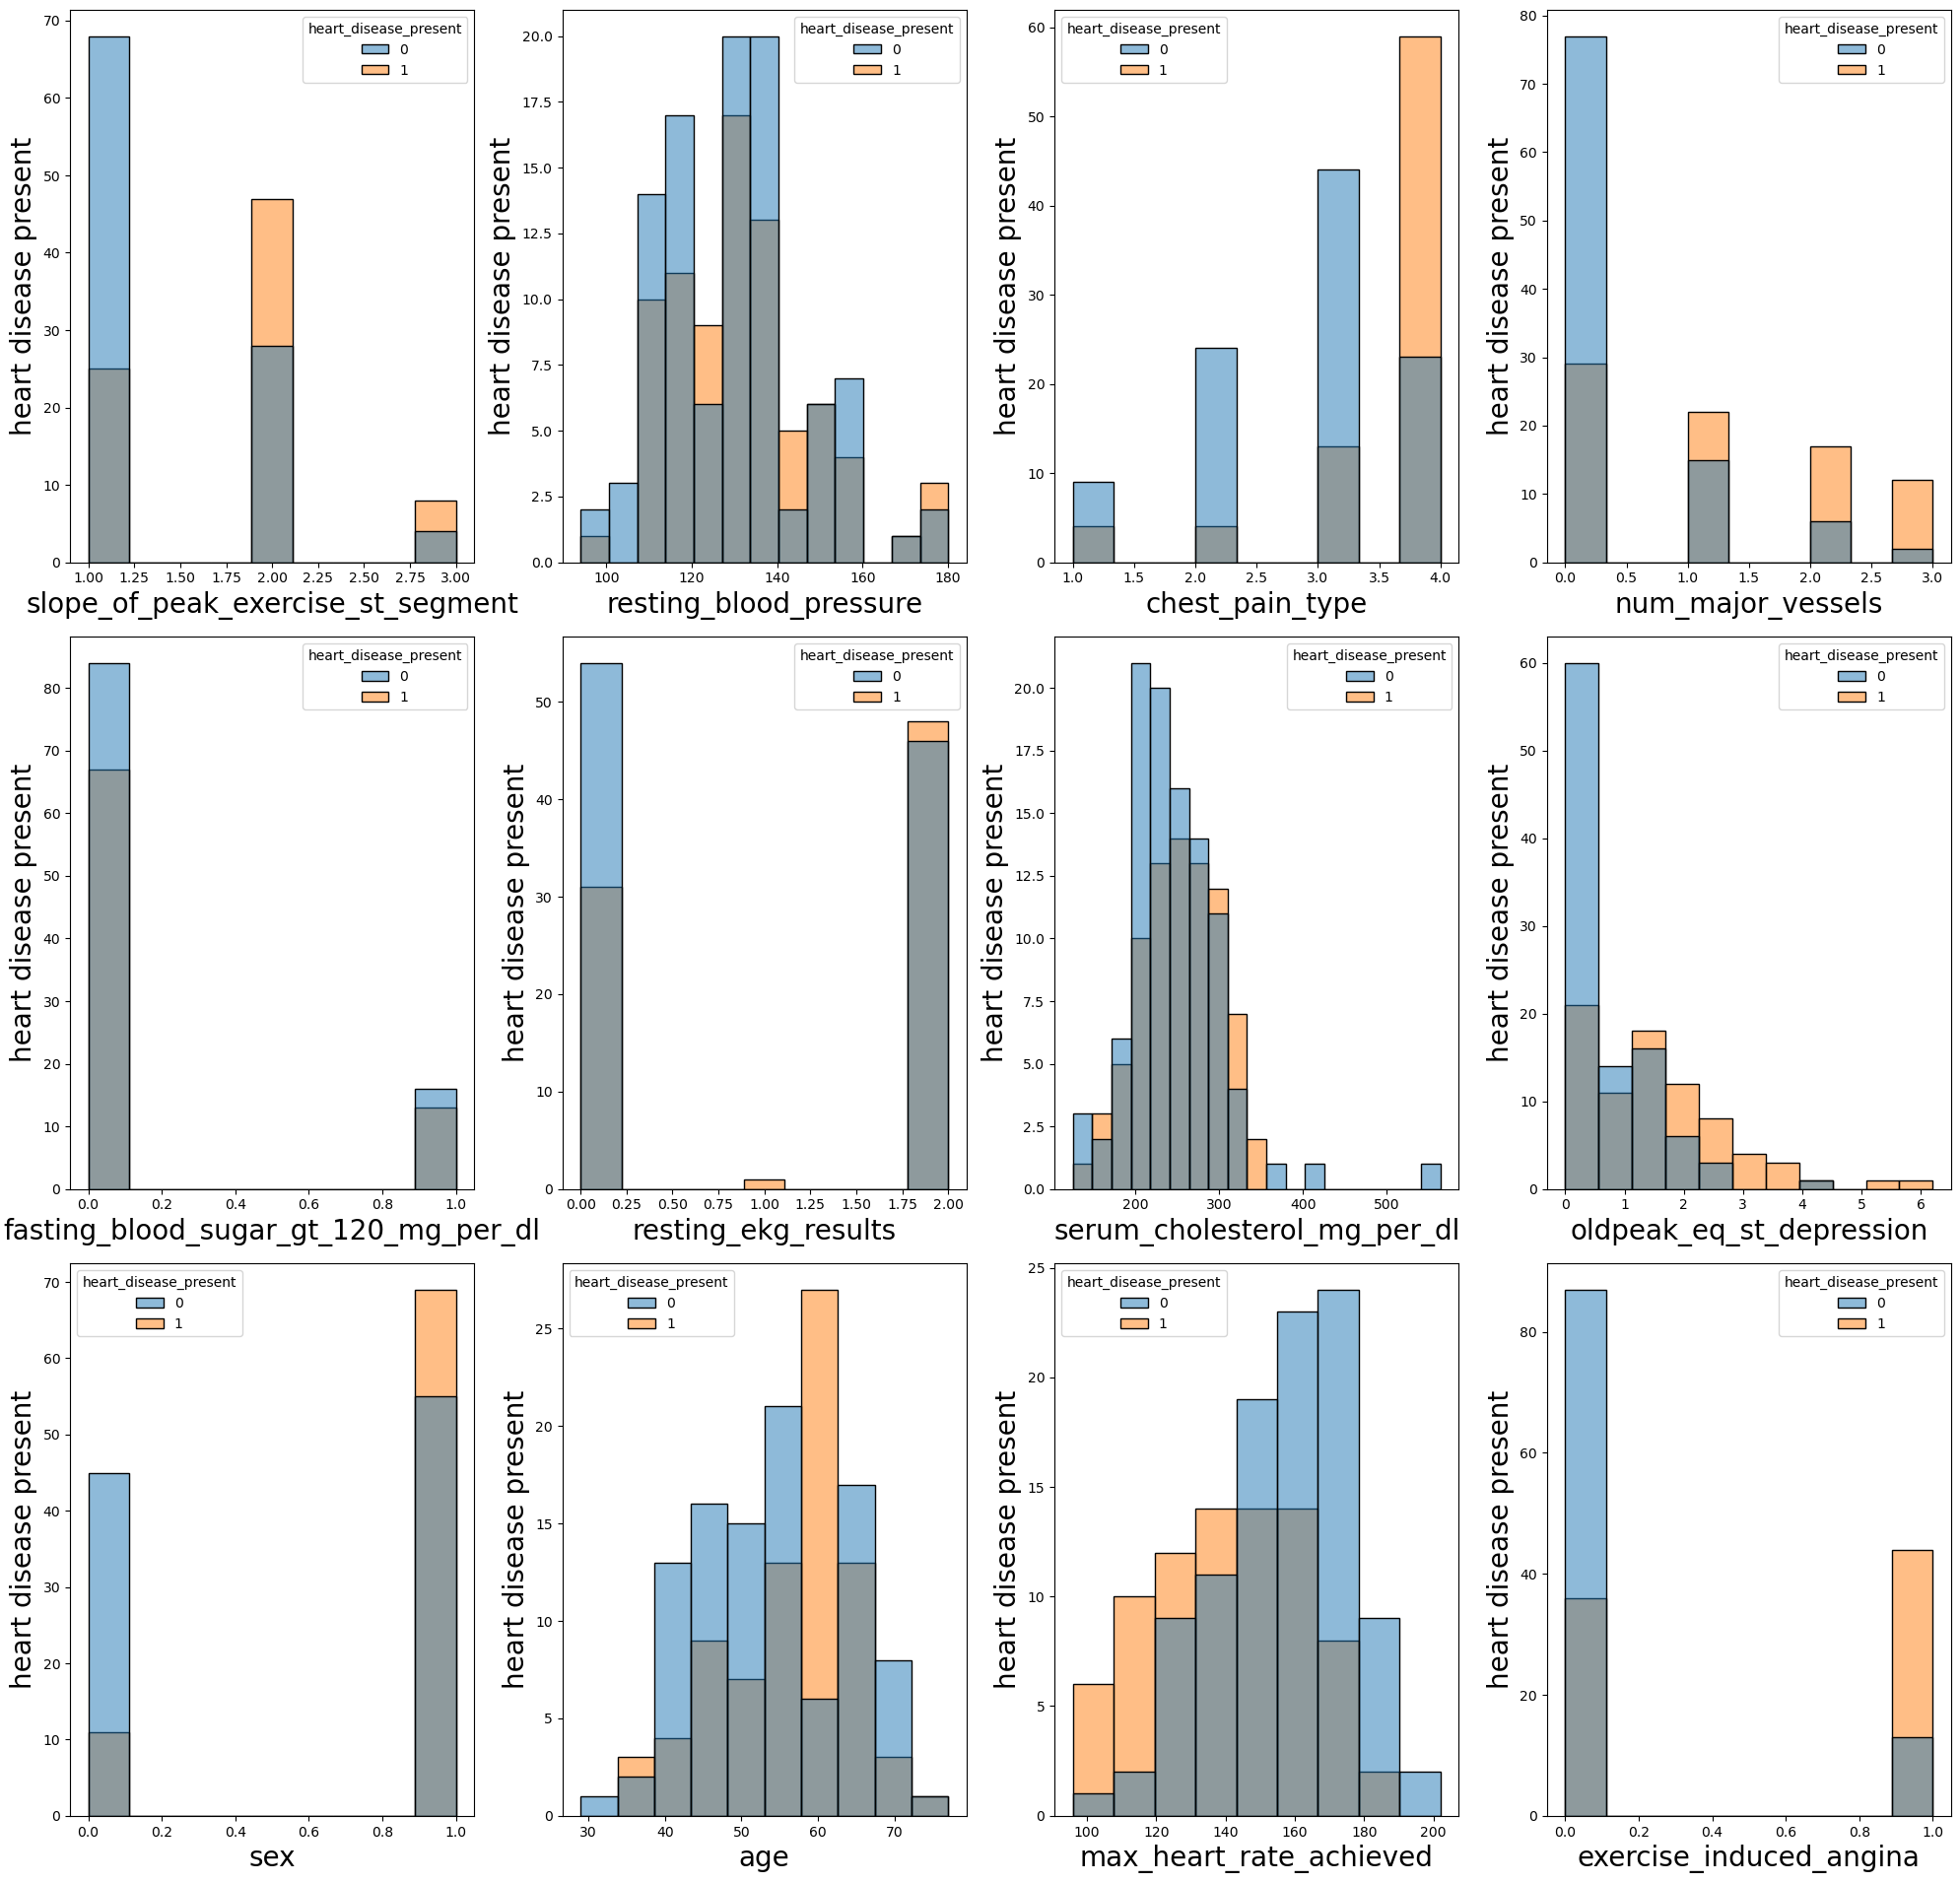

In [18]:
plt.figure(figsize=(20, 25), facecolor='white')  # Set canvas size for the plots
plotnumber = 1  # Counter to keep track of subplots

for column in numerical_data:  # Iterate through numerical columns
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)  # Create a subplot
        sns.histplot(x=numerical_data[column], hue=Heart_disease_dataset['heart_disease_present'])
        plt.xlabel(column, fontsize=20)  # Set x-axis label and font size
        plt.ylabel('heart disease present', fontsize=20)  # Set y-axis label and font size
    plotnumber += 1  # Increment the counter
plt.tight_layout()  # Adjust layout for better spacing


Observation:
1. Based on the visualization of all numerical data, it seems heart_disease_present, slope_of_peak_exercise_st_segment, chest_pain_type, num_major_vessels, fasting_blood_sugar_gt_120_mg_per_dl, resting_ekg_results,  sex, exercise_induced_angina are categorical data that are numerically encoded.

### Bivariate Analysis

### Bivariate analysis of age with heart_disease_present

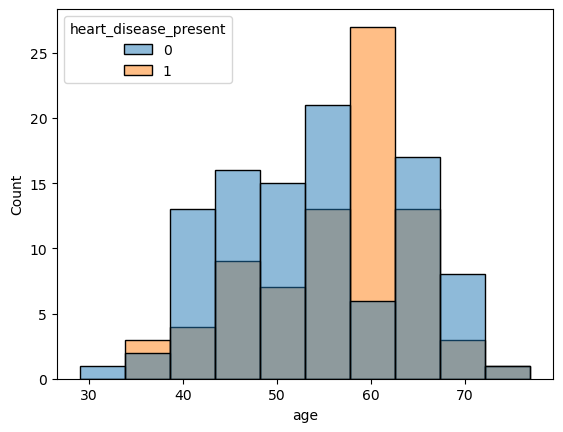

In [19]:
## Analyzing how Age impact the patient with heart_disease                   .
sns.histplot(x='age',hue='heart_disease_present',data=Heart_disease_dataset)
plt.show()

### Bivariate analysis of sex(gender) with heart_disease_present

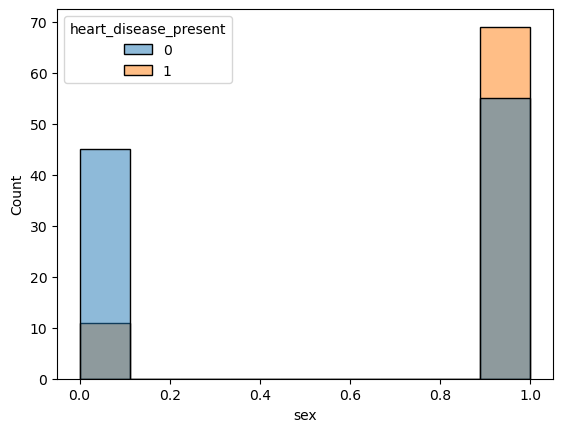

In [20]:
## Analyzing how Sex impact the patient with heart_disease  
#sex (type: binary): 0: female, 1: male
sns.histplot(x='sex',hue='heart_disease_present',data=Heart_disease_dataset)
plt.show()

In [21]:
# Group data by 'sex' and calculate sum of heart disease cases
heart_disease_counts = Heart_disease_dataset.groupby('sex')['heart_disease_present'].sum()
print(heart_disease_counts)

sex
0    11
1    69
Name: heart_disease_present, dtype: int64


Observations:
1.Out of 80 patients who have heart disease, 69 are male and only 11 are female.
2.Based on the above analysis, male patients have a higher risk of heart disease compared to female patients.

### Bivariate analysis of resting BP with heart_disease_present

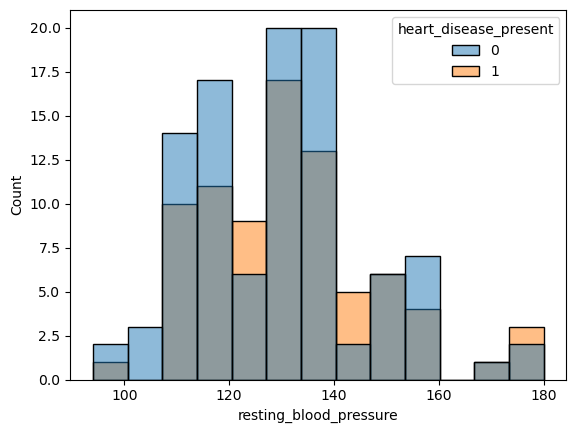

In [22]:
## Analyzing how BP impact the patient with heart_disease                   .
sns.histplot(x='resting_blood_pressure',hue='heart_disease_present',data=Heart_disease_dataset) 
plt.show()

Observations:

1. Patients with a resting blood pressure range above 120 have a higher risk of having heart disease.

### Bivariate analysis of chest_pain_type with heart_disease_present

chest_pain_type column with four values, such as 1, 2, 3, and 4.

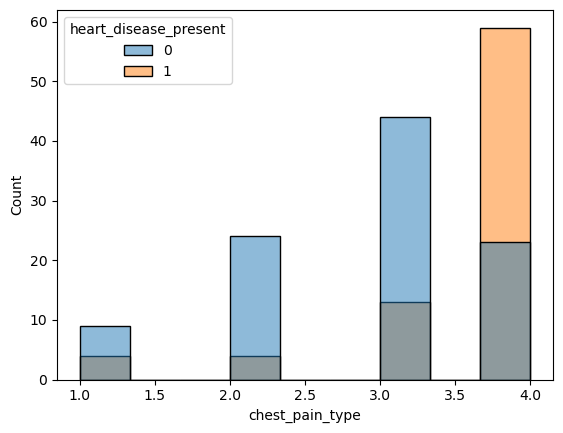

In [23]:
## Analyzing how Chest Pain impact the patient with heart_disease                   .
sns.histplot(x='chest_pain_type',hue='heart_disease_present',data=Heart_disease_dataset)  
plt.show()

Observations:

1. Patients with chest_pain_type 4 have a high probability of having heart disease.

### Bivariate analysis of slope_of_peak_exercise_st_segment with heart_disease_present

slope_of_peak_exercise_st_segment is an electrocardiography readout indicating the quality of blood flow to the heart. This column has three values, such as 1, 2, and 3.

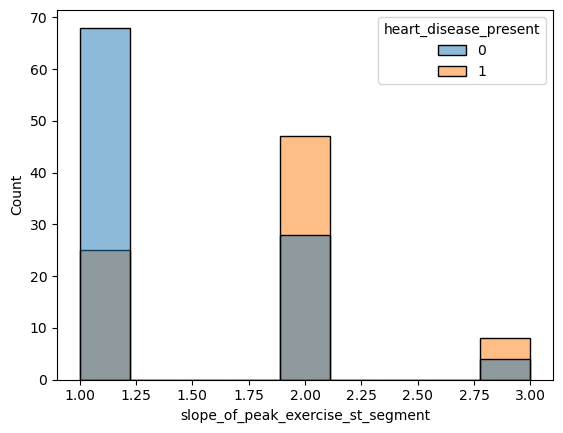

In [24]:
## Analyzing how Slope of peak impact the patient with heart_disease                   .
sns.histplot(x='slope_of_peak_exercise_st_segment',hue='heart_disease_present',data=Heart_disease_dataset)   
plt.show()

Observations:
1. Patients with a slope_of_peak_exercise_st_segment range of 2 and 3 have a higher probability of having heart disease.

# Visualizing all the columns using box plots to find outliers

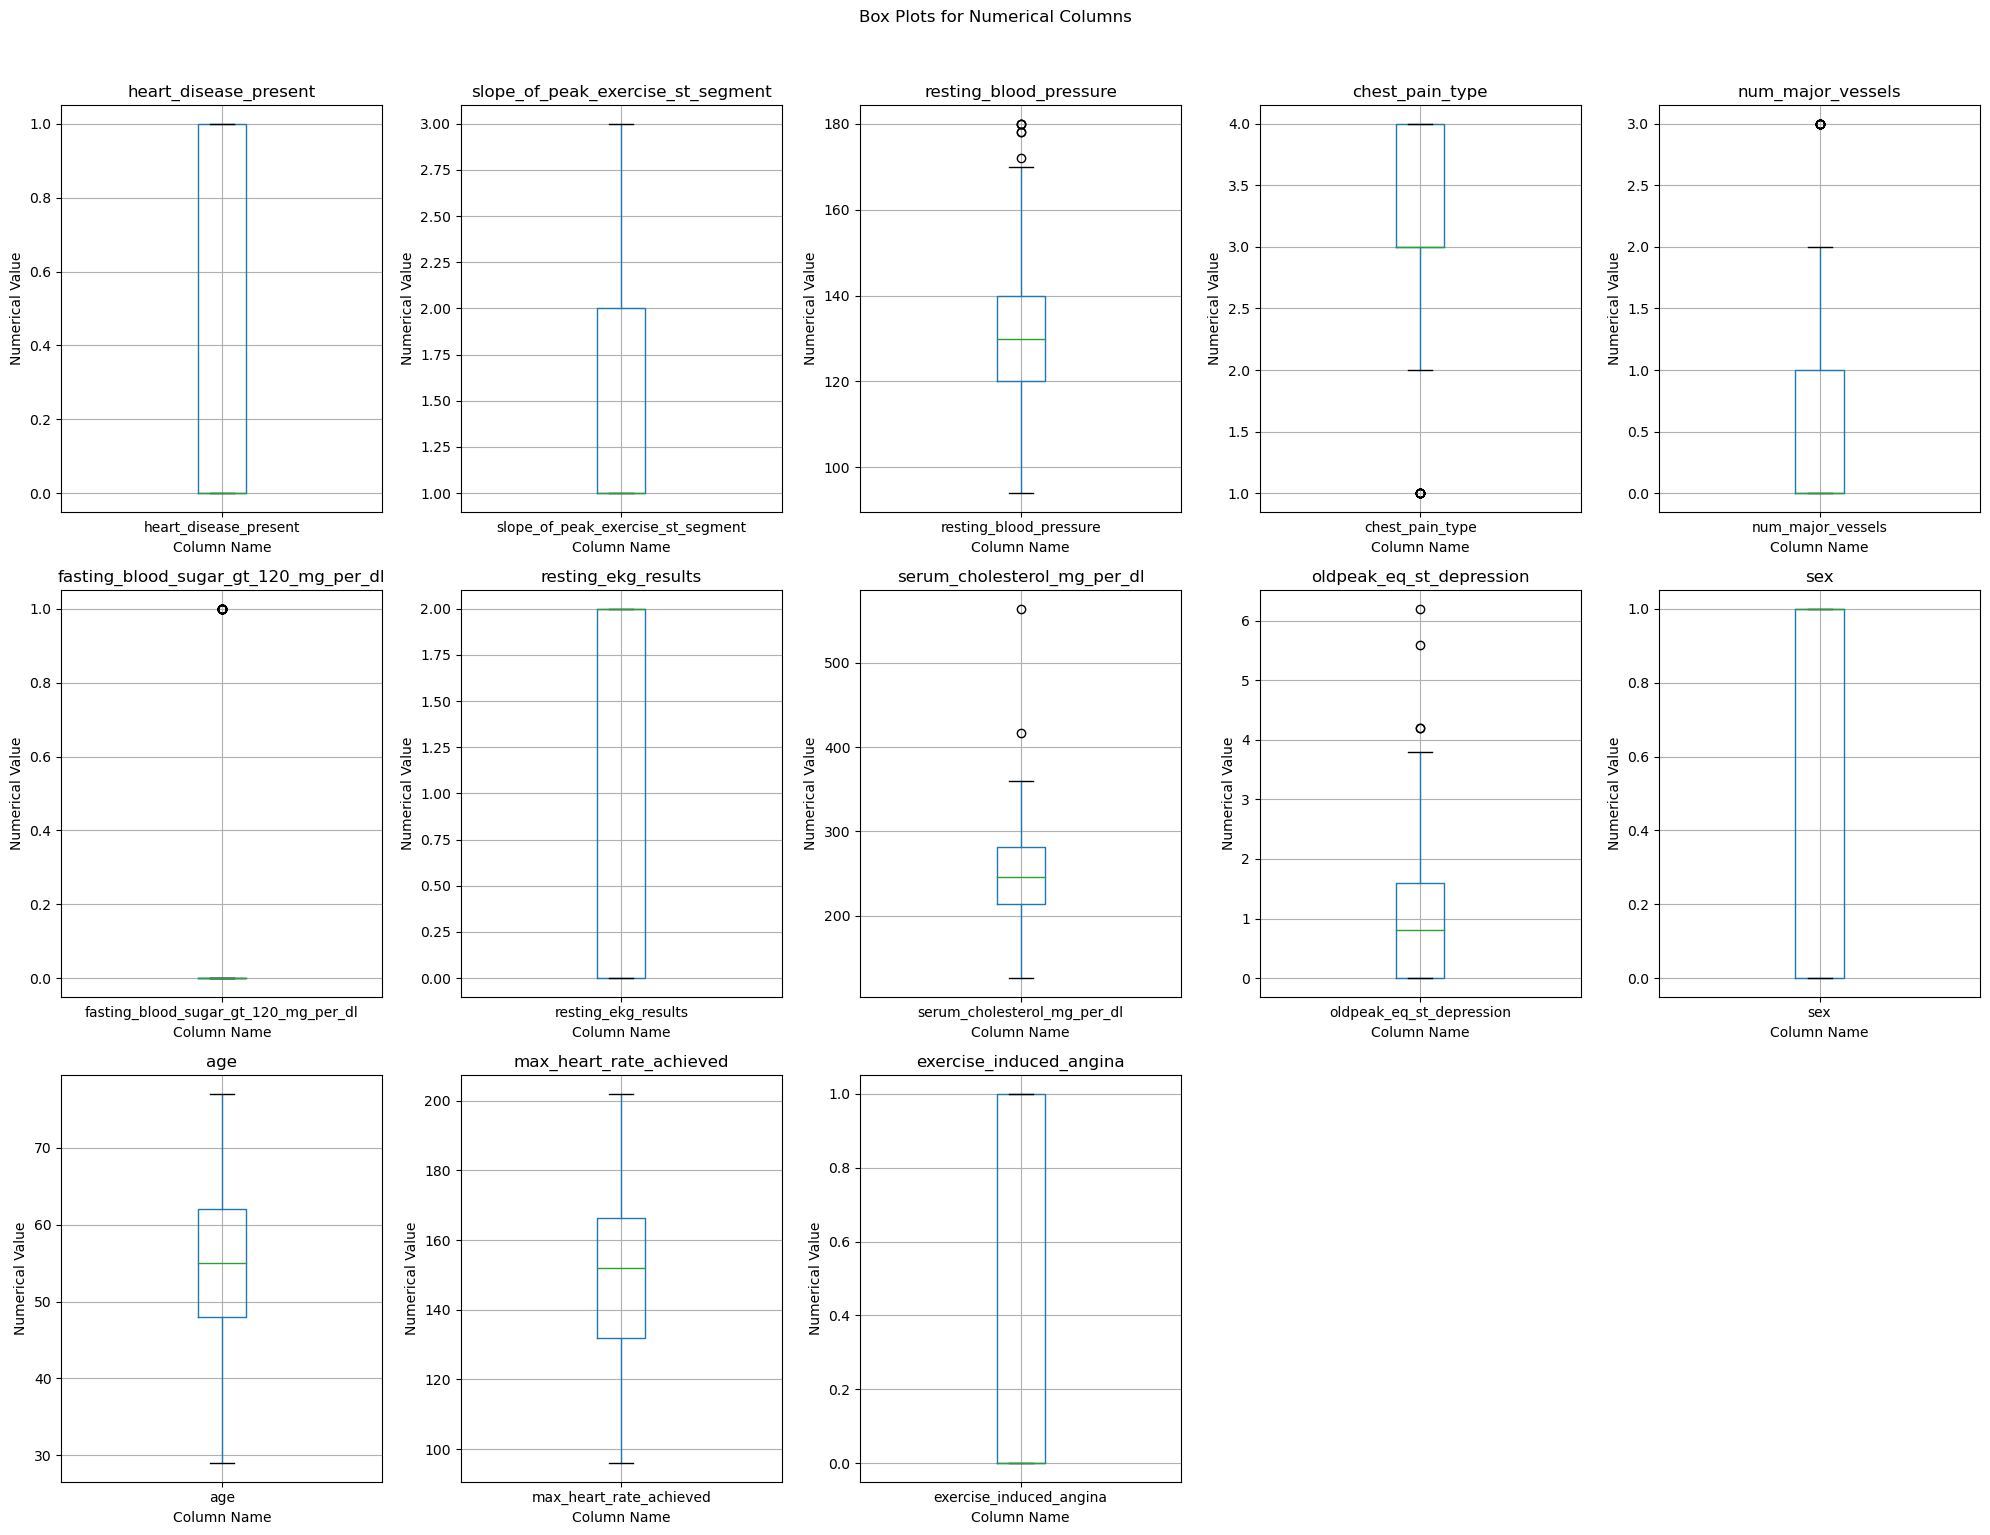

In [25]:
# Select numerical columns
numerical_columns = Heart_disease_dataset.select_dtypes(include=[np.number])

# Create subplots using pandas.plotting.boxplot
num_cols_per_row = 5
num_rows = (len(numerical_columns.columns) - 1) // num_cols_per_row + 1

fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 5 * num_rows))
fig.suptitle('Box Plots for Numerical Columns', y=1.02)

# Plot the box plots using pandas.plotting.boxplot
for i, col in enumerate(numerical_columns.columns):
    row_idx = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    ax = axes[row_idx, col_idx]
    numerical_columns.boxplot(column=col, ax=ax)
    ax.set_xlabel('Column Name')
    ax.set_ylabel('Numerical Value')
    ax.set_title(col)

# Remove any empty subplots
for i in range(len(numerical_columns.columns), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

## Remove or Ignore outliers

In [26]:
# List of columns to remove outliers
columns = ['resting_blood_pressure', 'serum_cholesterol_mg_per_dl', 'oldpeak_eq_st_depression']  

for c in columns:  
    q1 = Heart_disease_dataset[c].quantile(0.25)  # Calculate the first quartile (25th percentile)
    q3 = Heart_disease_dataset[c].quantile(0.75)  # Calculate the third quartile (75th percentile)
    iqr = q3 - q1  # Calculate the interquartile range (IQR)
    lower_bound = q1 - 1.5 * iqr  # Calculate lower bound using 1.5 times the IQR
    upper_bound = q3 + 1.5 * iqr  # Calculate upper bound using 1.5 times the IQR
    Heart_disease_dataset[c] = np.clip(Heart_disease_dataset[c], lower_bound, upper_bound)  # Clip values within the calculated bounds


## Recheck to ensure the ouliers are removed

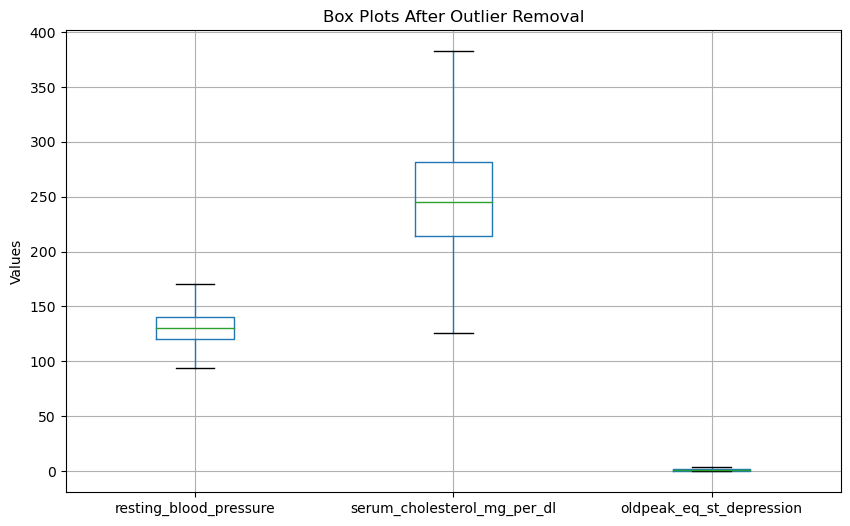

In [27]:
plt.figure(figsize=(10, 6))
# Create a box plot for specified columns after outlier removal
Heart_disease_dataset[columns].boxplot()
plt.title('Box Plots After Outlier Removal')
plt.ylabel('Values')
plt.show()

### Label Encoding converting categorical variables to numeric

In [28]:
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
# Applying label encoding to the 'thal' column
Heart_disease_dataset.thal=lc.fit_transform(Heart_disease_dataset.thal)

In [29]:
#Get unique values in the 'thal' column of the Heart Disease dataset.
Heart_disease_dataset.thal.unique()

array([1, 2, 0])

In [30]:
#Retrieve the data type of the 'thal' column in the Heart Disease dataset.
Heart_disease_dataset.thal.dtype

dtype('int32')

## Finding correlation of all the column values with the dependant variable heart_disease_present

In [31]:
#Calculate and print correlation of each feature with 'heart_disease_present', sorted in ascending order.
corr_data= Heart_disease_dataset.corr()['heart_disease_present']
print(corr_data.sort_values())

max_heart_rate_achieved                -0.375352
fasting_blood_sugar_gt_120_mg_per_dl    0.003379
resting_blood_pressure                  0.077279
serum_cholesterol_mg_per_dl             0.110973
age                                     0.138255
resting_ekg_results                     0.145933
sex                                     0.335421
slope_of_peak_exercise_st_segment       0.344224
oldpeak_eq_st_depression                0.391121
chest_pain_type                         0.412829
num_major_vessels                       0.421519
thal                                    0.447214
exercise_induced_angina                 0.448647
heart_disease_present                   1.000000
Name: heart_disease_present, dtype: float64


<Axes: >

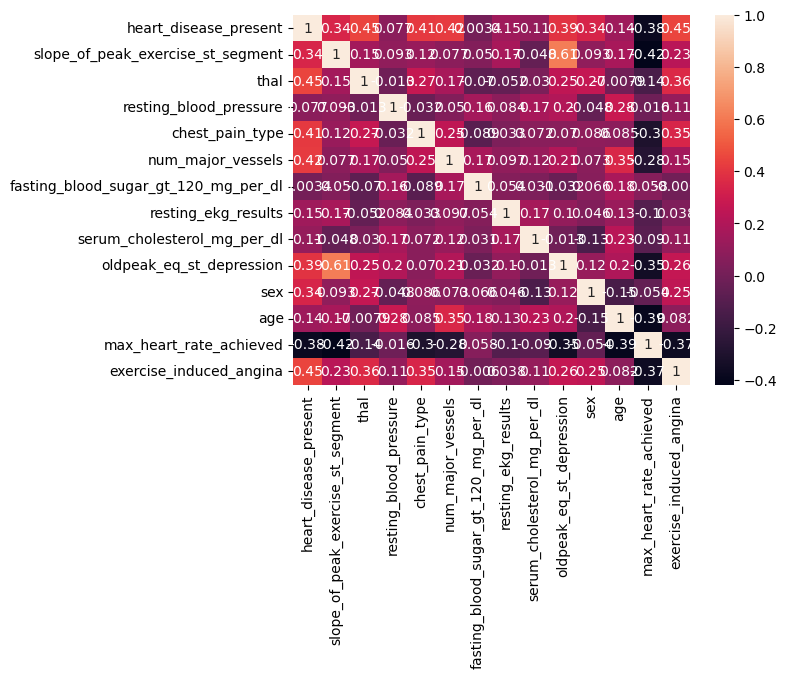

In [32]:
#Visualise correlation of each feature with 'heart_disease_present'.
sns.heatmap(Heart_disease_dataset.corr(),annot=True)

## Splitting final data set into Train and Test data

In [33]:
X = Heart_disease_dataset.drop(['heart_disease_present','patient_id'], axis=1)
Y = Heart_disease_dataset.heart_disease_present

In [34]:
## Creating training and testing data.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# 3.MODEL BUILDING

## 3.1.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Logistic Regression classifier
clf = LogisticRegression()

# Train the classifier on the training data
clf.fit(X_train, y_train)

LogisticRegression()

In [36]:
# Predict on the test data
y_pred = clf.predict(X_test)

# Perform predictions on test data
y_hat = clf.predict(X_test)

# Perform predictions on training data
y_train_predict = clf.predict(X_train)
# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88        84
           1       0.86      0.80      0.83        60

    accuracy                           0.86       144
   macro avg       0.86      0.85      0.86       144
weighted avg       0.86      0.86      0.86       144

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



## 3.2.DECISION TREEE

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Create a Decision Tree classifier
clf_dt = DecisionTreeClassifier()

# Train the classifier on the training data
clf_dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [38]:
# Predict on the test data
y_pred_dt = clf_dt.predict(X_test)

# Perform predictions on training data
y_train_predict_dt = clf_dt.predict(X_train)

# Evaluate the Decision Tree model using classification metrics
print("Decision Tree - Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict_dt))  # Precision, recall, F1 scores, and accuracy

print("Decision Tree - Classification Report - Test Data:")
print(classification_report(y_test, y_pred_dt))  # Precision, recall, F1 scores, and accuracy


Decision Tree - Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        60

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Decision Tree - Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.71      0.94      0.81        16
           1       0.93      0.70      0.80        20

    accuracy                           0.81        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.84      0.81      0.80        36



## 3.3.Support Vector Machine

In [39]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score,precision_score,recall_score

# Create an SVM classifier
clf_svc = SVC()

# Train the classifier on the training data
clf_svc.fit(X_train, y_train)

SVC()

In [40]:
# Predict on the test data
y_pred = clf_svc.predict(X_test)

# Perform predictions on test data
y_hat = clf_svc.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_svc.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.61      1.00      0.76        84
           1       1.00      0.10      0.18        60

    accuracy                           0.62       144
   macro avg       0.80      0.55      0.47       144
weighted avg       0.77      0.62      0.52       144

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63        16
           1       1.00      0.05      0.10        20

    accuracy                           0.47        36
   macro avg       0.73      0.53      0.36        36
weighted avg       0.76      0.47      0.33        36



## 3.4.XGBossting

In [41]:
#pip install xgboost
# Remove # to install xgboost if not installed

In [42]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Create an XGBoost classifier
clf_xgb = XGBClassifier()

# Train the classifier on the training data
clf_xgb.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [43]:
# Predict on the test data
y_pred = clf_xgb.predict(X_test)

# Perform predictions on test data
y_hat = clf_xgb.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_xgb.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        60

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



##  3.5. RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Create a Random Forest classifier
clf_rf = RandomForestClassifier()

# Train the classifier on the training data
clf_rf.fit(X_train, y_train)



RandomForestClassifier()

In [45]:

# Predict on the test data
y_pred = clf_rf.predict(X_test)

# Perform predictions on test data
y_hat = clf_rf.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_rf.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        60

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.73      1.00      0.84        16
           1       1.00      0.70      0.82        20

    accuracy                           0.83        36
   macro avg       0.86      0.85      0.83        36
weighted avg       0.88      0.83      0.83        36



## 3.6.lightgbm

In [ ]:
#pip install lightgbm
# Remove # to install light bgm if not installed

In [46]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Create a LightGBM classifier
clf_lgbm = LGBMClassifier()

# Train the classifier on the training data
clf_lgbm.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 60, number of negative: 84
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 177
[LightGBM] [Info] Number of data points in the train set: 144, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.416667 -> initscore=-0.336472
[LightGBM] [Info] Start training from score -0.336472
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

LGBMClassifier()

In [47]:
# Predict on the test data
y_pred = clf_lgbm.predict(X_test)

# Perform predictions on test data
y_hat = clf_lgbm.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_lgbm.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy

Classification Report - Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       1.00      1.00      1.00        60

    accuracy                           1.00       144
   macro avg       1.00      1.00      1.00       144
weighted avg       1.00      1.00      1.00       144

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.89      0.80      0.84        20

    accuracy                           0.83        36
   macro avg       0.83      0.84      0.83        36
weighted avg       0.84      0.83      0.83        36



## 3.7.Gaussian Naive Bayes 

In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, f1_score, precision_score, recall_score

# Create a Gaussian Naive Bayes classifier
clf_gnb = GaussianNB()

# Train the classifier on the training data
clf_gnb.fit(X_train, y_train)



GaussianNB()

In [49]:
# Predict on the test data
y_pred = clf_gnb.predict(X_test)

# Perform predictions on test data
y_hat = clf_gnb.predict(X_test)

# Perform predictions on training data
y_train_predict = clf_gnb.predict(X_train)

# Evaluate the model using classification metrics
print("Classification Report - Training Data:")
print(classification_report(y_train, y_train_predict))  # Precision, recall, F1 scores, and accuracy

print("Classification Report - Test Data:")
print(classification_report(y_test, y_hat))  # Precision, recall, F1 scores, and accuracy


Classification Report - Training Data:
              precision    recall  f1-score   support

           0       0.87      0.87      0.87        84
           1       0.82      0.82      0.82        60

    accuracy                           0.85       144
   macro avg       0.84      0.84      0.84       144
weighted avg       0.85      0.85      0.85       144

Classification Report - Test Data:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82        16
           1       1.00      0.65      0.79        20

    accuracy                           0.81        36
   macro avg       0.85      0.82      0.80        36
weighted avg       0.86      0.81      0.80        36



# MODEL COMPARISION REPORT

# Conclusion and Report on Challenges faced